# 2.4. Setting up training on Google Colab

## Data loading and preprocessing

In [25]:
import pandas as pd
from google.colab import files
#uploaded = files.upload()
data = pd.read_csv('/content/preprocessed_data (1).csv')
data = data.sample(frac=1) # a bit weird
data.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,...,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
962,Red,False,3,0.0,1.0,0.0,4.500000,3.000000,4.500,2.000000,35.000000,13.500000,1.500000,1.500000,29.000000,8.0,0.500000,7.500000,6.000000,0.000000,0.000000,41.000000,17.000000,0.445000,0.000000,0.000000,0.000000,0.000000,42.000000,18.000000,1.0,1.0,9.000000,6.500000,12.500000,7.500000,26.000000,13.000000,3.000000,2.500000,...,70.000000,36.500000,13.0,387.125000,0.0,0.0,0.0,0.0,4.0,1.0,0.0,5.0,187.96,190.50,205.0,26.0,30.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1433,Blue,False,3,2.0,0.0,0.0,0.500000,0.500000,0.000,0.000000,1.500000,1.000000,1.000000,0.500000,1.500000,0.5,0.000000,0.500000,0.500000,0.000000,0.500000,2.500000,1.500000,0.580000,0.000000,0.500000,0.000000,0.000000,3.500000,2.000000,0.0,2.0,2.000000,2.000000,0.500000,0.500000,1.500000,1.500000,9.500000,5.500000,...,74.666667,36.666667,8.0,799.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,170.18,177.80,135.0,35.0,28.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2841,Red,False,3,1.0,0.0,0.0,1.125000,1.000000,1.125,0.875000,8.125000,3.500000,1.125000,0.875000,6.000000,2.0,0.375000,3.250000,2.250000,0.000000,0.000000,10.375000,5.250000,0.555000,0.125000,0.125000,0.000000,0.000000,11.375000,6.250000,2.0,4.0,2.000000,1.875000,2.375000,1.875000,7.625000,4.250000,4.500000,3.875000,...,50.600000,29.600000,15.0,303.500000,0.0,0.0,1.0,1.0,3.0,0.0,0.0,5.0,182.88,182.88,185.0,31.0,28.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3410,Red,False,3,0.0,1.0,0.0,0.800000,0.800000,0.800,0.600000,7.400000,1.600000,6.200000,4.400000,13.200000,5.6,0.000000,0.400000,0.200000,2.000000,0.600000,14.400000,6.600000,0.710000,0.600000,2.000000,0.800000,0.480000,22.000000,12.400000,1.0,3.0,1.200000,0.800000,4.000000,2.600000,10.400000,6.400000,7.600000,4.600000,...,82.000000,67.363636,17.0,600.909091,1.0,0.0,0.0,0.0,1.0,5.0,0.0,6.0,185.42,182.88,205.0,36.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
409,Blue,False,3,0.0,1.0,0.0,23.714286,14.571429,30.000,21.285714,85.142857,30.428571,9.285714,5.428571,82.571429,27.0,0.142857,18.142857,15.571429,0.571429,0.285714,124.428571,57.142857,0.452857,0.142857,4.714286,1.428571,0.244286,148.285714,77.428571,3.0,3.0,13.714286,10.857143,17.428571,12.571429,79.285714,31.142857,2.142857,1.571429,...,102.250000,47.500000,9.0,544.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,172.72,175.26,135.0,37.0,37.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [0]:
data['Winner'] = data['Winner'].map(lambda x: 1 if x == 'Red' else 0)
data['title_bout'] = data['title_bout'].map(lambda x: 1 if x == 'True' else 0)

In [0]:
train_size = int(0.8*len(data))
features = data.drop(columns=['Winner'])
targets = data['Winner']
X_train, X_test = features.values[:train_size, :], features.values[train_size:, :]
y_train, y_test = targets.values[:train_size], targets.values[train_size:]

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(data)

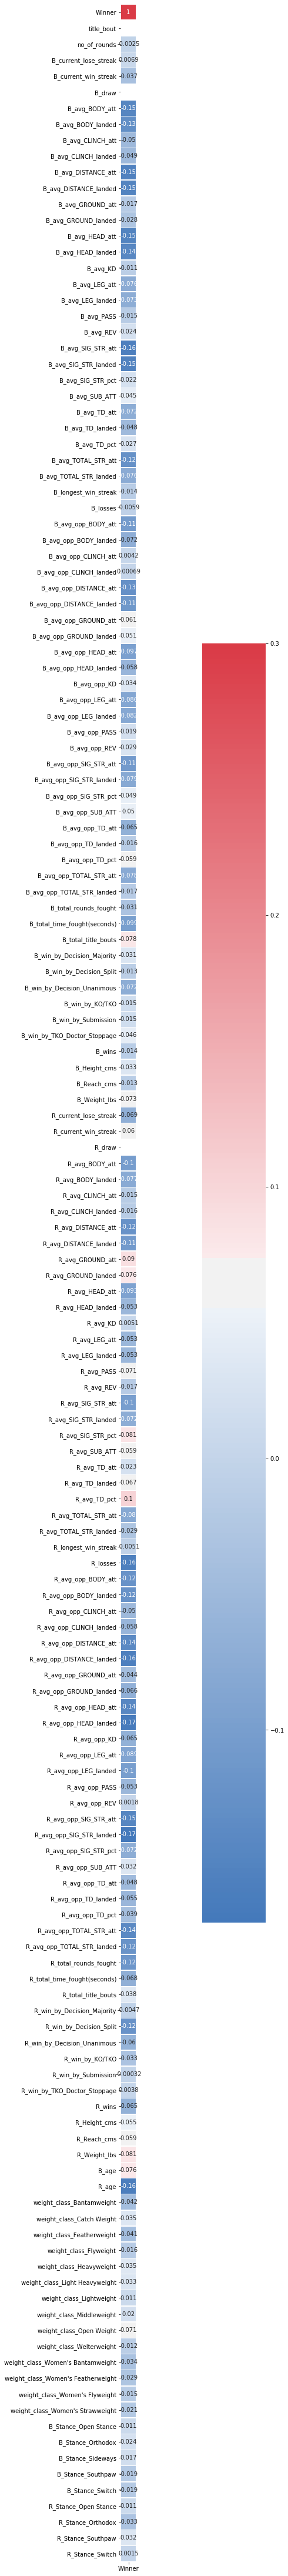

In [29]:
corr = data.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(40, 80))
sns.heatmap(corr[['Winner']], cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)

## Tensorflow ANNs

In [30]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'), # 0 or x: _____/
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') # [0, 1]
])

adam_optimizer = tf.keras.optimizers.Adam()
model.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
    ]
)

model.fit(X_train, y_train, epochs=50)

Train on 2873 samples
Epoch 1/50
2873/2873 [==============================] - 1s 176us/sample - loss: 11.0399 - accuracy: 0.5816
Epoch 2/50
2873/2873 [==============================] - 0s 62us/sample - loss: 5.2942 - accuracy: 0.5858
Epoch 3/50
2873/2873 [==============================] - 0s 67us/sample - loss: 2.1757 - accuracy: 0.5924
Epoch 4/50
2873/2873 [==============================] - 0s 64us/sample - loss: 1.1540 - accuracy: 0.6049
Epoch 5/50
2873/2873 [==============================] - 0s 61us/sample - loss: 0.8599 - accuracy: 0.6206
Epoch 6/50
2873/2873 [==============================] - 0s 64us/sample - loss: 0.7316 - accuracy: 0.6397
Epoch 7/50
2873/2873 [==============================] - 0s 66us/sample - loss: 0.7173 - accuracy: 0.6471
Epoch 8/50
2873/2873 [==============================] - 0s 63us/sample - loss: 0.6495 - accuracy: 0.6603
Epoch 9/50
2873/2873 [==============================] - 0s 63us/sample - loss: 0.6448 - accuracy: 0.6582
Epoch 10/50
2873/2873 [========

In [31]:
model.evaluate(X_test, y_test)

719/719 [==============================] - 0s 137us/sample - loss: 0.6298 - accuracy: 0.6467


[0.6297591208416828, 0.64673156]

In [0]:
!pip install --upgrade tensorflow